# Students Adaptability Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d mdmahmudulhasansuzan/students-adaptability-level-in-online-education

Dataset URL: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education
License(s): CC-BY-SA-4.0
  0%|                                               | 0.00/6.43k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 6.43k/6.43k [00:00<00:00, 25.1MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Students Adaptability Prediction/students-adaptability-level-in-online-education.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Students Adaptability Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [5]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [15]:
df.shape

(1205, 14)

In [6]:
df.size

16870

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


In [9]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [11]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

In [12]:
df['Adaptivity Level'].value_counts()

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

## Data Visualization

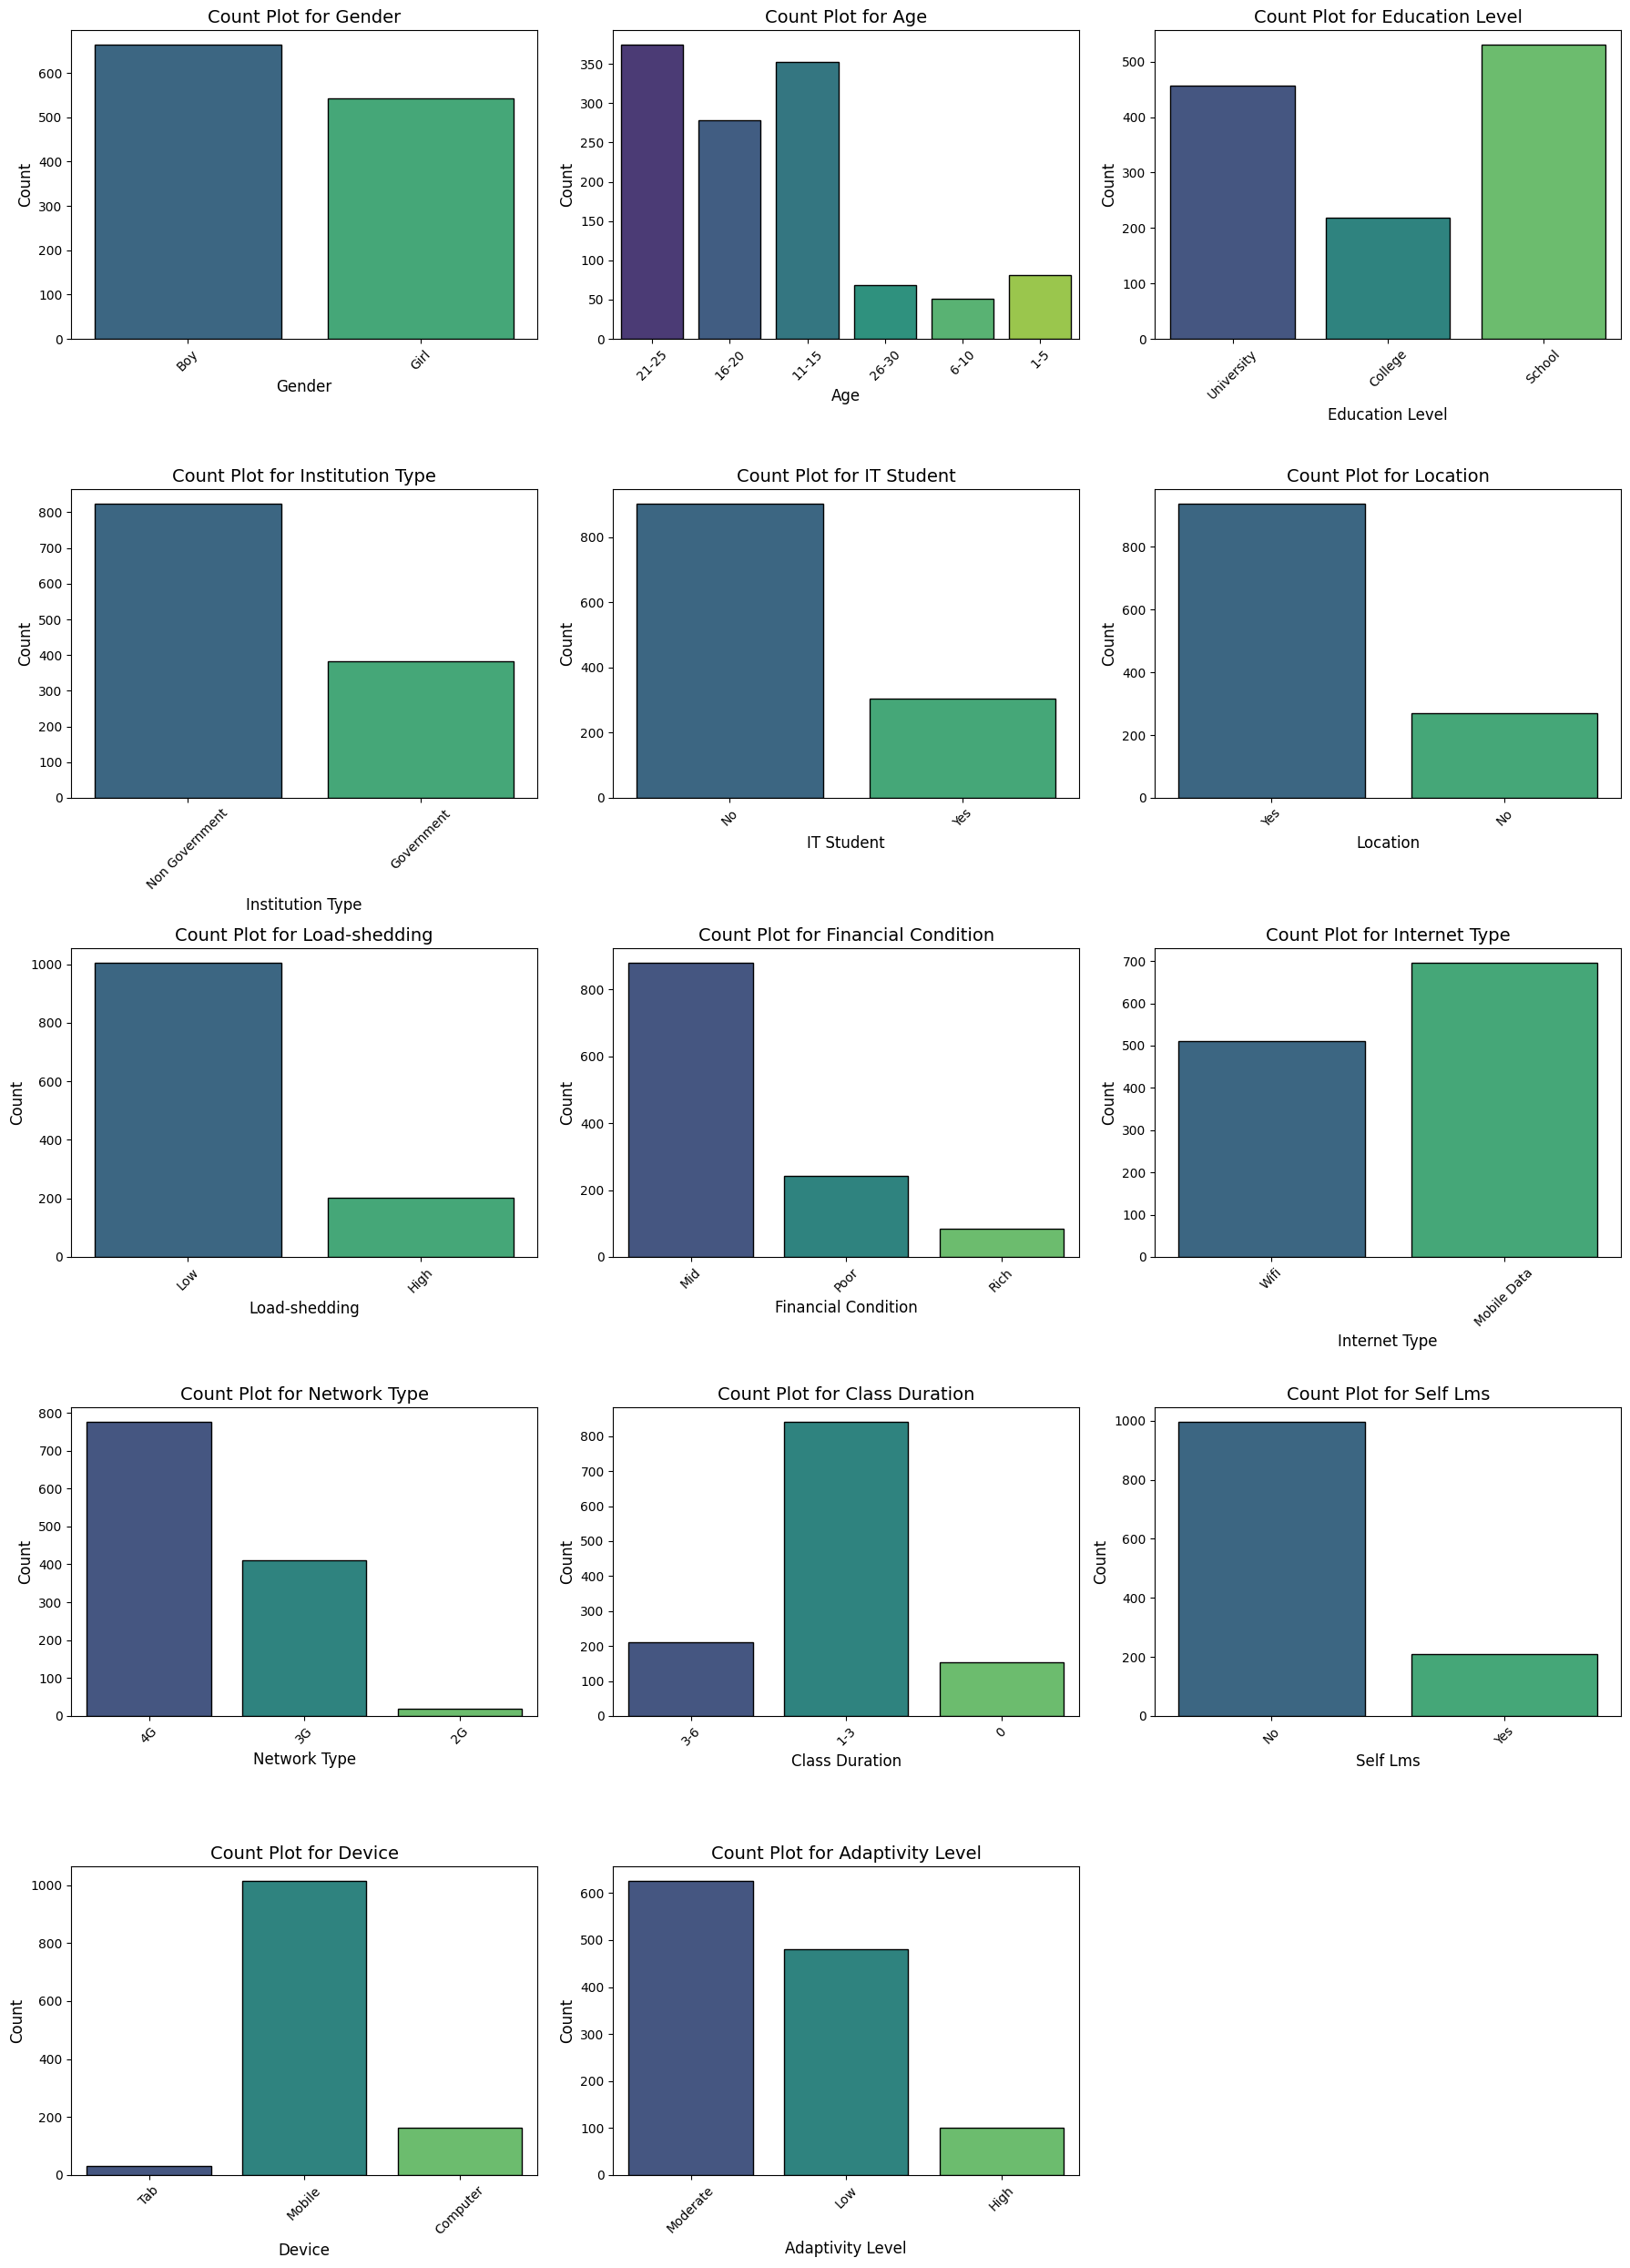

In [16]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [17]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.6887966804979253, 0.6804979253112033, 0.9045643153526971, 0.9087136929460581, 0.6514522821576764, 0.8340248962655602, 0.9045643153526971, 0.9087136929460581, 0.7717842323651453]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.75      0.55      0.64       103
           2       0.65      0.85      0.74       115

    accuracy                           0.69       241
   macro avg       0.71      0.63      0.65       241
weighted avg       0.70      0.69      0.68       241

Confusion Matrix:
 [[11  5  7]
 [ 1 57 45]
 [ 3 14 98]]


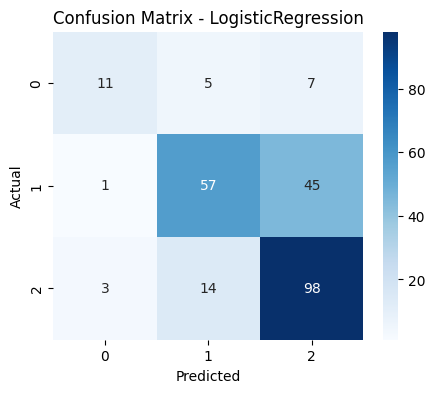

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.30      0.45        23
           1       0.73      0.56      0.64       103
           2       0.64      0.86      0.74       115

    accuracy                           0.68       241
   macro avg       0.75      0.58      0.61       241
weighted avg       0.70      0.68      0.67       241

Confusion Matrix:
 [[ 7  6 10]
 [ 0 58 45]
 [ 1 15 99]]


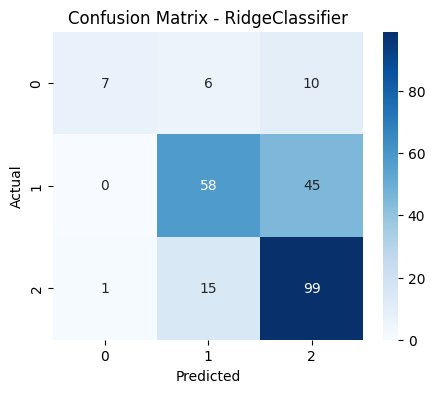

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.92      0.93       103
           2       0.89      0.94      0.91       115

    accuracy                           0.90       241
   macro avg       0.90      0.84      0.86       241
weighted avg       0.90      0.90      0.90       241

Confusion Matrix:
 [[ 15   0   8]
 [  2  95   6]
 [  0   7 108]]


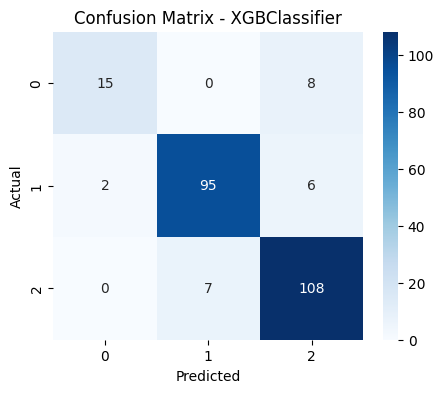

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.94      0.93       103
           2       0.90      0.93      0.91       115

    accuracy                           0.91       241
   macro avg       0.90      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241

Confusion Matrix:
 [[ 15   0   8]
 [  2  97   4]
 [  0   8 107]]


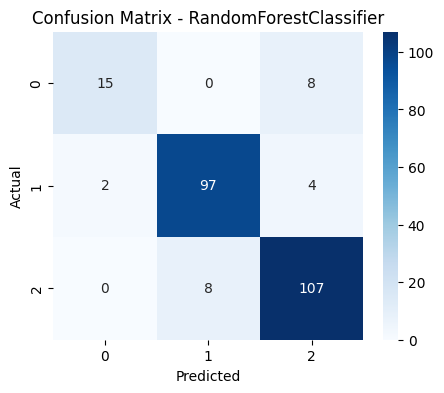

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.35      0.50        23
           1       0.76      0.49      0.59       103
           2       0.60      0.86      0.70       115

    accuracy                           0.65       241
   macro avg       0.75      0.56      0.60       241
weighted avg       0.69      0.65      0.64       241

Confusion Matrix:
 [[ 8  1 14]
 [ 0 50 53]
 [ 1 15 99]]


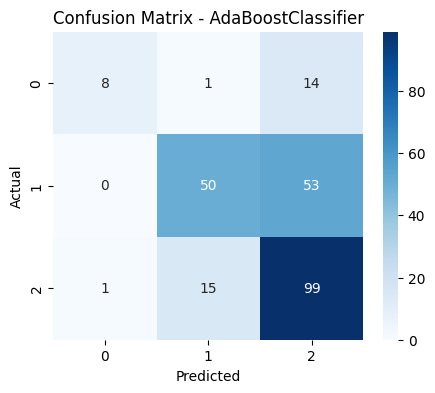

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.86      0.84      0.85       103
           2       0.81      0.88      0.84       115

    accuracy                           0.83       241
   macro avg       0.85      0.76      0.79       241
weighted avg       0.84      0.83      0.83       241

Confusion Matrix:
 [[ 13   0  10]
 [  2  87  14]
 [  0  14 101]]


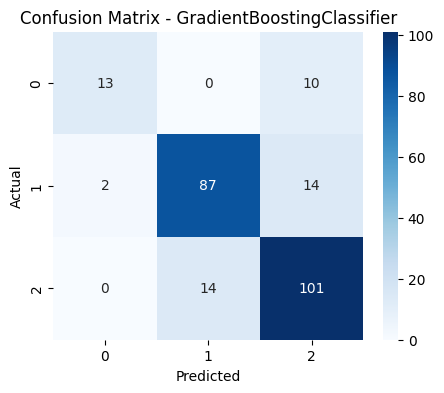

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.92      0.93      0.93       103
           2       0.89      0.92      0.91       115

    accuracy                           0.90       241
   macro avg       0.88      0.84      0.86       241
weighted avg       0.90      0.90      0.90       241

Confusion Matrix:
 [[ 15   0   8]
 [  2  96   5]
 [  1   8 106]]


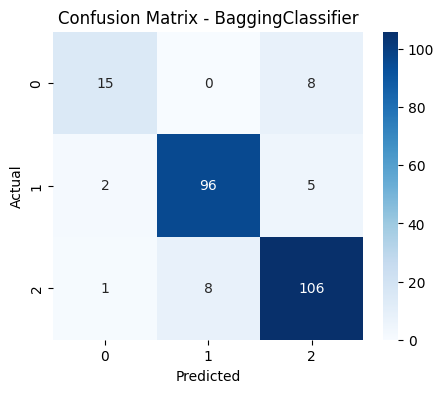

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.90      0.92       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241

Confusion Matrix:
 [[ 15   0   8]
 [  2  93   8]
 [  1   7 107]]


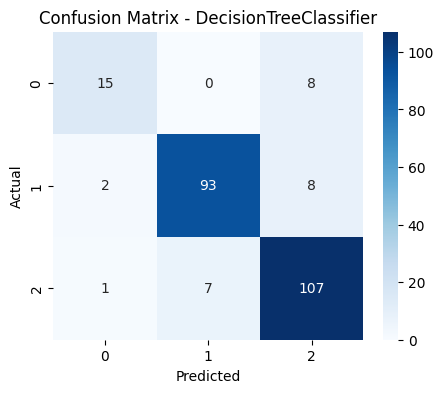

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.62        23
           1       0.89      0.66      0.76       103
           2       0.71      0.92      0.80       115

    accuracy                           0.77       241
   macro avg       0.79      0.70      0.73       241
weighted avg       0.79      0.77      0.77       241

Confusion Matrix:
 [[ 12   2   9]
 [  1  68  34]
 [  3   6 106]]


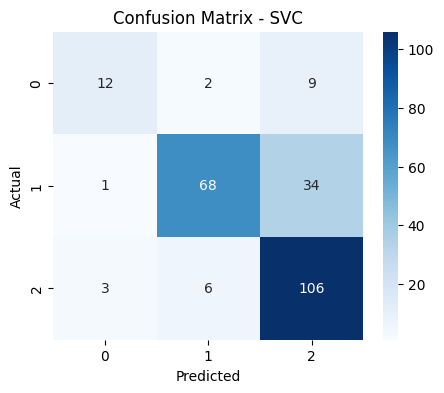

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()